In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Load Inbuild MNIST Data Set

In [3]:
from tensorflow.keras.datasets import mnist

# Use keras to load pre shuffeled mnist dataset
(X_train, y_train),(X_test, y_test) = mnist.load_data()
print("The MNIST data base has training set of %d examples."%len(X_train))  # %d is hepl to get a number
print("The MINST data base has test set od %d examples."%len(X_test))

11490434/11490434 [==============================] - 0s 0us/step
The MNIST data base has training set of 60000 examples.
The MINST data base has test set od 10000 examples.


# Visualise The First Six Training Images

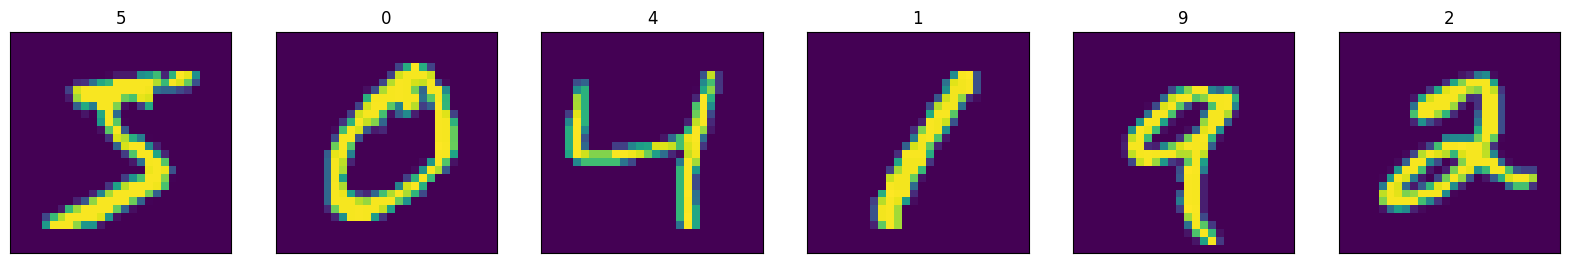

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import matplotlib.cm as cm


# Plotting first six training images
fig = plt.figure(figsize=(20,10))
for i in range(6):
  ax = fig.add_subplot(1,6,i+1,xticks=[],yticks=[])  # (xticks=[],yticks=[]) used to get the axis, im set empty because we dont required the axis 
  ax.imshow(X_train[i])  # If you need gray scale that time use cmap='gray
  ax.set_title(str(y_train[i]))


  

# Visualise Image In More Detail

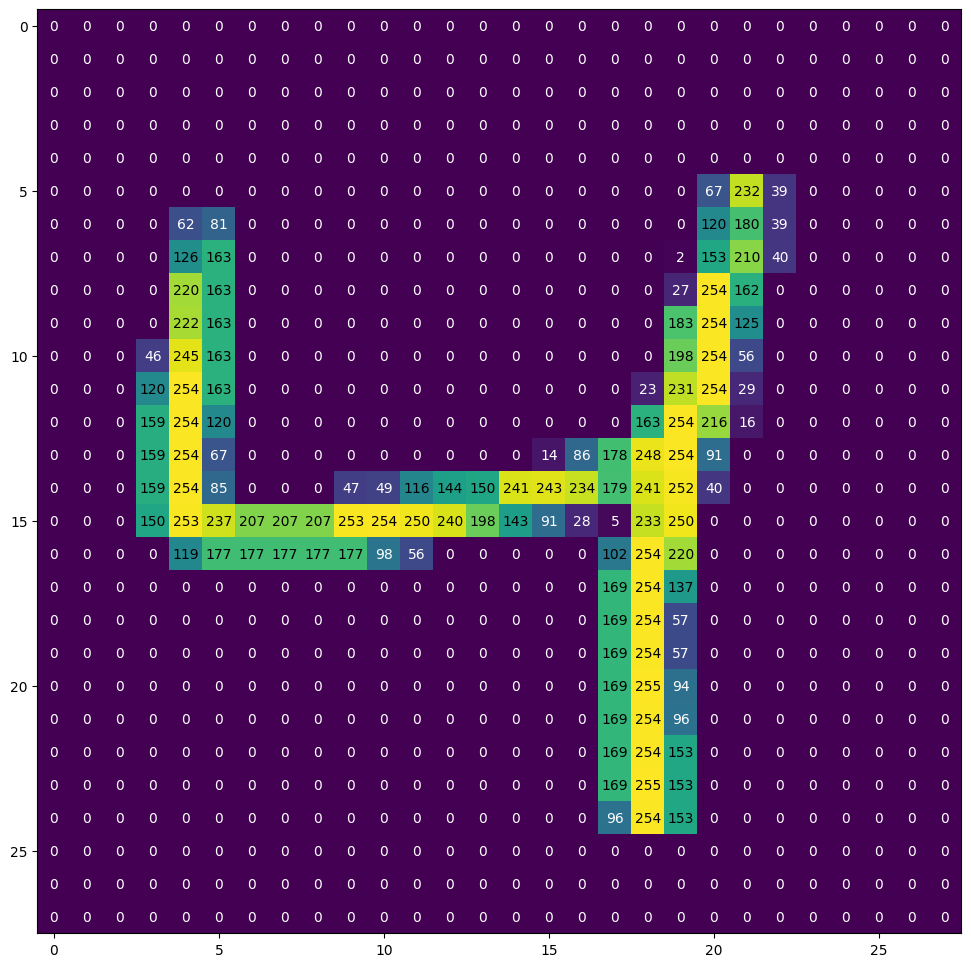

In [5]:
def visualize_input(img, ax):
  ax.imshow(img)
  width, height = img.shape
  thresh = img.max()/2.5
  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y],2)),xy=(y,x),
                  horizontalalignment='center',
                  verticalalignment='center',
                  color='white' if img[x][y]<thresh else 'black')
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[2], ax)


# Pre-Process The Input Image

In [6]:
# Rescale the image by dividing every pixel of image by 255

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

print("X_train",X_train.shape)
print("X_train samples",X_train.shape[0]) # 0 is index no
print("X_test",X_test.shape[0]) # 0 is index no

X_train (60000, 28, 28)
X_train samples 60000
X_test 10000


In [7]:
# Convert a categorical labels to numerical becuase whenever you do multiclass classification that time we need to do one hot encoding
from keras.utils import np_utils # Utils convert a array into one hot encoding

num_classes = 10
print("Integer valued labels",y_train[:10])

# Convert a class vector to binary class metrics
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)



Integer valued labels [5 0 4 1 9 2 1 3 1 4]


In [8]:
# Print first 10 one hot encoded labels
print("One hot encoded Lebels",y_train[:10])


One hot encoded Lebels [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# Reshape The Data To Fit Our CNN Model

In [9]:
# Reshape doing because the images is gray scale image, here we are adding channel
img_rows, img_cols = 28,28

X_train = X_train.reshape(X_train.shape[0],img_rows,img_cols,1) # Here we are add channel
X_test = X_test.reshape(X_test.shape[0],img_rows, img_cols,1)

input_shape = (img_rows, img_cols, 1)

print("Input shape",input_shape)
print("X_train", X_train.shape)
print("X_test",X_test.shape)

Input shape (28, 28, 1)
X_train (60000, 28, 28, 1)
X_test (10000, 28, 28, 1)


# Define The Model Architecture

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

# Create a model object
model = Sequential()

# Conv2D: add conv layer with relu activation and depth of kernel is 32
model.add(Conv2D(16, kernel_size=(3,3), padding='same',activation='relu',input_shape=(28,28,1)))
# pool1: downsample the image to extract the best feature
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer
model.add(Flatten())

# FCNN1
model.add(Dense(64, activation='relu'))

# FCNN2
model.add(Dense(10, activation='softmax'))

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

# Compile The Model

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train The Model


In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint

# train the model
# Because we train neural network on batches thats why we use checkpointer
# Callbacks is save the good model
# CNN is a heavy model for that purpose thats why we use hdf5 extension
# Verbose: is used to display the output

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True )


# Model fitting:
# Shuffle: Shuffle is used to shfflue the data and avoid overfitting proble
hist = model.fit(X_train, y_train, batch_size=64, epochs=10,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.06317, saving model to model.weights.best.hdf5
938/938 - 17s - loss: 0.2136 - accuracy: 0.9343 - val_loss: 0.0632 - val_accuracy: 0.9789 - 17s/epoch - 18ms/step
Epoch 2/10

Epoch 2: val_loss improved from 0.06317 to 0.04388, saving model to model.weights.best.hdf5
938/938 - 5s - loss: 0.0554 - accuracy: 0.9826 - val_loss: 0.0439 - val_accuracy: 0.9866 - 5s/epoch - 5ms/step
Epoch 3/10

Epoch 3: val_loss improved from 0.04388 to 0.04027, saving model to model.weights.best.hdf5
938/938 - 5s - loss: 0.0397 - accuracy: 0.9879 - val_loss: 0.0403 - val_accuracy: 0.9872 - 5s/epoch - 6ms/step
Epoch 4/10

Epoch 4: val_loss improved from 0.04027 to 0.03169, saving model to model.weights.best.hdf5
938/938 - 4s - loss: 0.0306 - accuracy: 0.9902 - val_loss: 0.0317 - val_accuracy: 0.9901 - 4s/epoch - 5ms/step
Epoch 5/10

Epoch 5: val_loss improved from 0.03169 to 0.03005, saving model to model.weights.best.hdf5
938/938 - 5s - loss: 0.0264 - accurac

# Loading Weights

In [13]:
### 10. Load the Model with the Best Classification Accuracy on the Validation Set
# load the weights that yielded the best validation accuracy

# Loadweigths gives a best accuracy model
model.load_weights('model.weights.best.hdf5')

# Calculate The Accuracy 

In [14]:
score = model.evaluate(X_test,y_test,verbose=0)
score


[0.02860804833471775, 0.9914000034332275]